In [1]:
import os
base_dir = 'C:\Users\Ben\Documents\GitHub\expression_broad_data'
os.chdir(base_dir) 
from core import expression_plots 
from core import io_library 
# from IPython.core.debugger import Tracer
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import csv
import scipy.cluster.hierarchy as sch
from collections import Counter
import math
import plotly.plotly as py
py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
import cufflinks as cf
from matplotlib.colors import LogNorm
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api

#from sklearn.cluster import AgglomerativeClustering


In [2]:
%load_ext autoreload
%autoreload 2
#%matplotlib inline
%matplotlib notebook

In [ ]:
#This file should be main one for comparing SC and KL PKA inhibition directly to one another. 

In [3]:
#Load NMPP1 Data for KL
kl_nmpp1_lfc = pd.read_pickle(base_dir + "\expression_data\kl_PKA_as_20160824\LFC_KLac_ASmin_ASplus.pkl")


In [4]:
#Load NMPP1 Data for SC

sc_nmpp1_solis = io_library.load_solis_NMPP1_data('WT')

C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning:

Mean of empty slice



In [26]:
#Load KL to SC ortholog mapping

kl_orthologs = pd.read_pickle(base_dir + "\expression_data\ortholog_files_YGOB\kl_orthologs.pkl")


In [29]:
#Map KL PKA inhibition data onto related SC orthologs
#First change column name for kl_nmpp1_lfc data to match ortholog table for merge. 
kl_nmpp1_lfc_renamed = kl_nmpp1_lfc.copy()
kl_nmpp1_lfc_renamed.columns = ['kl_genename'] + list(kl_nmpp1_lfc.columns[1:])
kl_PKA_data_sc_orthologs = pd.merge(kl_orthologs, kl_nmpp1_lfc_renamed, on = 'kl_genename', how = 'inner')

In [37]:
#Merge SC and KL Data
#KL data is from DEseq2, and NMPP1 is from averaged O'shea Microarrays. 
#kl_sc_PKA_data = pd.merge(kl_PKA_data_sc_orthologs,mace_SC_PKA_data, on = 'sc_genename', how = 'inner')
kl_sc_PKA_data = kl_PKA_data_sc_orthologs.join(sc_nmpp1_solis, on = 'sc_genename')

#would be good to output here how many genes don't merge (missing orthologs in either direction)
#Much of this is to be done in kl_sc_orthologs_pblast

In [38]:
#save kl_sc_PKA_data
kl_sc_PKA_data.to_pickle(base_dir + "\expression_data\kl_PKA_as_20160824\kl_sc_PKA_data")

In [3]:
#load kl_sc_PKA_data
kl_sc_PKA_data = pd.read_pickle(base_dir + "\expression_data\kl_PKA_as_20160824\kl_sc_PKA_data")

In [7]:
#Lookup by SC common name
#jso_msn2_targets = ['SSA1', 'SSA4', 'HSP104', 'CTT1', 'TPK1', 'TFS1', 'DDR2', 'TSA1', 'HSP12', 'TMA10', 'TPS2', 'RTC3', 'GPH1', 'HXK1', 'TSA2', 'CYC7', 'PNC1', 'GSY1', 'FMP48', 'SS13', 'ALD4', 'YNR014W', 'HOR2', 'YOR173W', 'RAS2', 'GLK1', 'GPD1', 'HSP26', 'SIP18', 'TKL2', 'FMP16', 'ALD3', 'PGM2']
common_name_query = ['CTT1']  #['SSA1', 'SSA2','AHA1','BTN2', 'CPR6','CUR1','FES1','HCH1','HSC82','HSP42','HSP104','HSP78','HSP82','MBF1','MDJ1','SIS1','STI1','YDJ1']
kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(common_name_query)].sort_values(by='KL_PKA(AS)+1NMPP1')


,N SCer Orthologs,kl_genename,sc_genename,KL_PKA(AS)+1NMPP1,padj,SC_PKA(AS)+1NMPP1,SC_common_name
2220,1,KLLA0D14685g,YGR088W,1.733099,5.343571e-190,6.86678,CTT1


In [8]:
#Lookup by SC common name
jso_msn2_targets = ['SSA1', 'SSA4', 'HSP104', 'CTT1', 'TPK1', 'TFS1', 'DDR2', 'TSA1', 'HSP12', 'TMA10', 'TPS2', 'RTC3', 'GPH1', 'HXK1', 'TSA2', 'CYC7', 'PNC1', 'GSY1', 'FMP48', 'SS13', 'ALD4', 'YNR014W', 'HOR2', 'YOR173W', 'RAS2', 'GLK1', 'GPD1', 'HSP26', 'SIP18', 'TKL2', 'FMP16', 'ALD3', 'PGM2']
common_name_query =  jso_msn2_targets# ['SSA1', 'SSA2','AHA1','BTN2', 'CPR6','CUR1','FES1','HCH1','HSC82','HSP42','HSP104','HSP78','HSP82','MBF1','MDJ1','SIS1','STI1','YDJ1']
kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(common_name_query)].sort_values(by='KL_PKA(AS)+1NMPP1')


,N SCer Orthologs,kl_genename,sc_genename,KL_PKA(AS)+1NMPP1,padj,SC_PKA(AS)+1NMPP1,SC_common_name
4968,2,KLLA0F16929g,YEL039C,-2.527498,0.000000e+00,3.973370,CYC7
4854,2,KLLA0C04004g,YDL022W,-1.419206,1.077434e-144,2.257500,GPD1
4896,2,KLLA0B09152g,YBR117C,-0.747965,4.451658e-56,7.101090,TKL2
4889,2,KLLA0B01628g,YML028W,-0.322977,1.167157e-10,1.065760,TSA1
4888,2,KLLA0B01628g,YDR453C,-0.322977,1.167157e-10,5.425140,TSA2
4176,2,KLLA0C13387g,YNL098C,0.503657,5.440968e-15,0.980681,RAS2
1073,1,KLLA0D07634g,YFL014W,0.581167,4.341468e-37,8.109950,HSP12
4456,2,KLLA0B07205g,YJL164C,0.816100,1.637265e-33,1.738230,TPK1
4368,2,KLLA0D11352g,YFR053C,0.818555,3.536386e-10,3.883940,HXK1
3628,1,KLLA0E10143g,YDR074W,1.467153,1.595993e-137,3.082660,TPS2


In [41]:
#Highlight hits that are statistically significant for K.Lactis 

#Add column which highlights only pvalues below a threshold
pthreshold = 10e-25

kl_sc_PKA_data_sig = kl_sc_PKA_data[kl_sc_PKA_data['padj'] < pthreshold]
kl_sc_PKA_data_unsig = kl_sc_PKA_data[kl_sc_PKA_data['padj'] > pthreshold]

fig = {
    'data': [
  		{
  			'x': kl_sc_PKA_data_sig['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_sig['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_sig['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'kl padj < ' + str(pthreshold)},
        {
        	'x': kl_sc_PKA_data_unsig['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_unsig['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_unsig['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'kl padj > ' + str(pthreshold)}
    ],
    'layout': {
        'xaxis': {'title': 'KL LFC 4uM NMPP1'},
        'yaxis': {'title': "SC Fold Change"}
    }
}

# IPython notebook
# py.iplot(fig, filename='pandas/multiple-scatter')

url = py.plot(fig, filename='sc_kl_scatter_sig_highlight_solis')




,N SCer Orthologs,kl_genename,sc_genename,KL_PKA(AS)+1NMPP1,padj,SC_PKA(AS)+1NMPP1,SC_common_name
0,1,KLLA0E08273g,YIL093C,-2.815044,9.071084e-180,0.508382,RSM25
1,1,KLLA0E02179g,YNL323W,-0.800056,2.070460e-29,-0.212855,LEM3
2,1,KLLA0F12056g,YKR076W,4.077268,0.000000e+00,3.018760,ECM4
3,1,KLLA0E19691g,YDL174C,0.976116,1.148538e-48,1.605860,DLD1
4,1,KLLA0F20273g,YOR163W,0.243003,7.867288e-03,0.726875,DDP1
5,1,KLLA0D06127g,YOR246C,-0.904063,1.801050e-19,-1.725100,ENV9
6,1,KLLA0E07063g,YOL137W,-0.175169,1.940537e-02,-1.247190,BSC6
7,1,KLLA0F04499g,YNL067W,-4.181069,0.000000e+00,-2.915070,RPL9B
8,1,KLLA0C15257g,YDR237W,-2.423532,8.844173e-194,0.462295,MRPL7
9,1,KLLA0E08867g,YNL015W,2.750747,0.000000e+00,3.431360,PBI2


In [4]:
#Plot raw expression of KL v.s. SC and highlight Activated and Repressed ESR genes

#Load raw count data from Solis Dataset.  
fname_sc_PKA_counts = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq\solis_2016_counts.pkl')
sc_PKA_counts = pd.read_pickle(fname_sc_PKA_counts)
#make genename a column
sc_PKA_counts['sc_genename'] = sc_PKA_counts.index
#rename columns for sc minus and sc plus
new_columns = list(sc_PKA_counts.columns)
new_columns[2]='sc_as_plus'
new_columns[3]='sc_as_minus'
sc_PKA_counts.columns = new_columns

#Load raw count data for K.Lactis. 
fname_KL_PKA_counts = os.path.normpath(base_dir + '\expression_data\kl_PKA_as_20160824\\20160824_KL_PKA_AS.txt')
kl_PKA_counts = pd.read_table(fname_KL_PKA_counts)

#Convert kl_genename to standard format. 
kl_genename = []
for gene in kl_PKA_counts.iloc[:,0]:
    if gene[0:5]=='KLLA0':
        new_gene = gene.split('_')[0]+gene.split('_')[1]
    else: 
        new_gene = gene
    kl_genename.append(new_gene)

kl_PKA_counts['kl_genename'] = kl_genename
kl_PKA_counts_asonly = kl_PKA_counts.loc[:,('kl_genename','AS1_minus','AS2_minus','AS1_plus','AS2_plus')]

#normalize each column
conditions = ['AS1_minus','AS2_minus','AS1_plus','AS2_plus']
total_reads = kl_PKA_counts_asonly.loc[:,conditions].sum()
for condition in conditions: 
    norm_reads = (kl_PKA_counts_asonly.loc[:,condition]*np.mean(total_reads))/total_reads[condition]
    kl_PKA_counts_asonly[condition + '_norm'] = norm_reads

#average repeats
kl_PKA_counts_asonly['kl_as_minus'] = (kl_PKA_counts_asonly['AS1_minus_norm']+kl_PKA_counts_asonly['AS2_minus_norm'])/2
kl_PKA_counts_asonly['kl_as_plus'] = (kl_PKA_counts_asonly['AS1_plus_norm']+kl_PKA_counts_asonly['AS2_plus_norm'])/2

#Merge with copy of full dataframe
#kl_sc_PKA_data_counts = kl_sc_PKA_data.copy()

kl_sc_PKA_data_counts_just_kl = pd.merge(kl_sc_PKA_data, kl_PKA_counts_asonly.loc[:,('kl_genename','kl_as_minus','kl_as_plus')], on='kl_genename', how = 'left')
kl_sc_PKA_data_counts = pd.merge(kl_sc_PKA_data_counts_just_kl,sc_PKA_counts.loc[:,('sc_genename','sc_as_minus','sc_as_plus')],on='sc_genename',how = 'left')
#overlay ESR



<IPython.core.display.Javascript object>


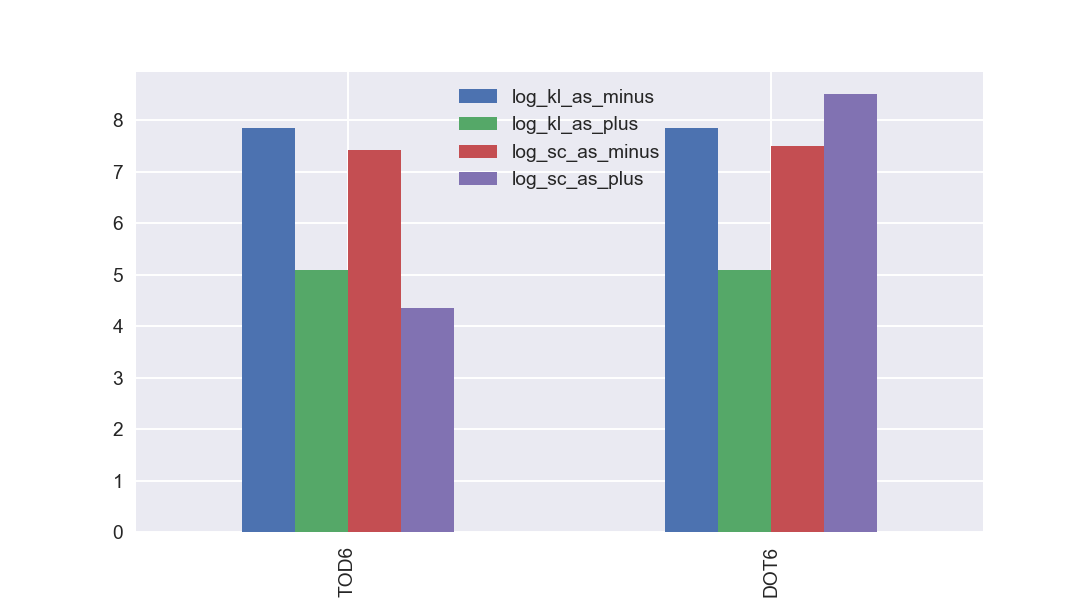

In [29]:
columns = ['kl_as_minus','kl_as_plus','sc_as_minus','sc_as_plus']
gene_list = ['DOT6','TOD6']#['HSP12','EGO4','CTT1','HSP26','SIP18']
raw_exp_for_barplot = kl_sc_PKA_data_counts[kl_sc_PKA_data_counts['SC_common_name'].isin(gene_list)].loc[:,['SC_common_name']+ columns]
raw_exp_for_barplot.set_index('SC_common_name', inplace = True)
for column in columns:
    raw_exp_for_barplot['log_' + column] = np.log(raw_exp_for_barplot[column])
raw_exp_for_barplot[['log_' + column for column in columns]].plot.bar()




In [13]:
a = ['kl_as_minus','kl_as_plus','sc_as_minus','sc_as_plus']
[1] + a

[1, 'kl_as_minus', 'kl_as_plus', 'sc_as_minus', 'sc_as_plus']

In [9]:
#Plot SC "ESR activated" and "ESR repressed" genes onto SC/VS KL plot

ESR_types = ['activated','repressed']
ESR_genes = {}
for ESR_type in ESR_types:
     ESR_genes[ESR_type] = io_library.get_gasch_ESR_list(ESR_type)

#241 activated genes
#539 repressed genes
#4196 remaining genes
kl_sc_PKA_data_counts_ESR_activated = kl_sc_PKA_data_counts[kl_sc_PKA_data_counts['sc_genename'].isin(ESR_genes['activated'])]
kl_sc_PKA_data_counts_ESR_repressed = kl_sc_PKA_data_counts[kl_sc_PKA_data_counts['sc_genename'].isin(ESR_genes['repressed'])]
kl_sc_PKA_data_counts_notESR = kl_sc_PKA_data_counts[~kl_sc_PKA_data_counts['sc_genename'].isin(ESR_genes['repressed']+ESR_genes['activated'])]


x_axis = ['sc_as_minus','kl_as_minus','kl_as_minus','kl_as_plus']
y_axis = ['sc_as_plus','kl_as_plus','sc_as_minus','sc_as_plus']
xy_axes = zip(x_axis,y_axis)
for xy_pair in xy_axes: 
    fig = {
        'data': [
      		{
            	'x': np.log(kl_sc_PKA_data_counts_notESR[xy_pair[0]]), 
            	'y': np.log(kl_sc_PKA_data_counts_notESR[xy_pair[1]]), 
            	'text': kl_sc_PKA_data_counts_notESR['SC_common_name'], 
            	'mode': 'markers', 
            	'name': 'non-ESR genes'},
      		{
            	'x': np.log(kl_sc_PKA_data_counts_ESR_activated[xy_pair[0]]), 
            	'y': np.log(kl_sc_PKA_data_counts_ESR_activated[xy_pair[1]]), 
            	'text': kl_sc_PKA_data_counts_ESR_activated['SC_common_name'], 
            	'mode': 'markers', 
            	'name': 'ESR Activated genes'},
      		{
      			'x': np.log(kl_sc_PKA_data_counts_ESR_repressed[xy_pair[0]]), 
            	'y': np.log(kl_sc_PKA_data_counts_ESR_repressed[xy_pair[1]]), 
            	'text': kl_sc_PKA_data_counts_ESR_repressed['SC_common_name'], 
            	'mode': 'markers', 
            	'name': 'ESR Repressed genes'}
                ],
        'layout': {
            'xaxis': {'title': xy_pair[0]},
            'yaxis': {'title': xy_pair[1]}
        }
    }

    url = py.plot(fig, filename='ESR genes '+ xy_pair[0] + ' vs ' + xy_pair[1] )


C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning:

divide by zero encountered in log

C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:24: RuntimeWarning:

divide by zero encountered in log

C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning:

divide by zero encountered in log



In [13]:
ESR_status

sc_genename
YIL093C      unchanged
YNL323W      unchanged
YKR076W      activated
YDL174C      unchanged
YOR163W      unchanged
YOR246C      unchanged
YOL137W      unchanged
YNL067W      repressed
YDR237W      unchanged
YNL015W      activated
YFL022C      repressed
YDL004W      unchanged
YPR046W      unchanged
YHR064C      repressed
YNL305C      activated
YGR172C      unchanged
YGR116W      unchanged
YBR215W      unchanged
YGL093W      unchanged
YGL236C      unchanged
YGR147C      unchanged
YDR036C      unchanged
YIL154C      unchanged
YKL124W      activated
YKL160W      unchanged
YML088W      unchanged
YFL046W      unchanged
YGR117C      unchanged
YEL036C      unchanged
YHR099W      unchanged
               ...    
YNL001W      repressed
YCL001W-B    unchanged
YHR021C      repressed
YKL156W      repressed
YEL030W      unchanged
YJR045C      unchanged
YDL226C      unchanged
YNL204C      unchanged
YOR229W      unchanged
YPL139C      unchanged
YLR028C      unchanged
YMR120C      unchanged

In [5]:
#plot scatter plot in matplotlib - won't be interactive, but will be easier to make standard plots

#add in ESR type column 
ESR_types = ['activated','repressed']
ESR_genes = {}
for ESR_type in ESR_types:
     ESR_genes[ESR_type] = io_library.get_gasch_ESR_list(ESR_type)

ESR_status = pd.Series(index = kl_sc_PKA_data_counts['sc_genename'])
for gene in kl_sc_PKA_data_counts['sc_genename']:
    if gene in ESR_genes['activated']: 
        ESR_status[gene] = 'activated'
    elif gene in ESR_genes['repressed']: 
        ESR_status[gene] = 'repressed'
    else:
        ESR_status[gene] = 'unchanged'

kl_sc_PKA_data_counts['ESR_status'] = list(ESR_status)


#kl_sc_PKA_data_counts

<IPython.core.display.Javascript object>


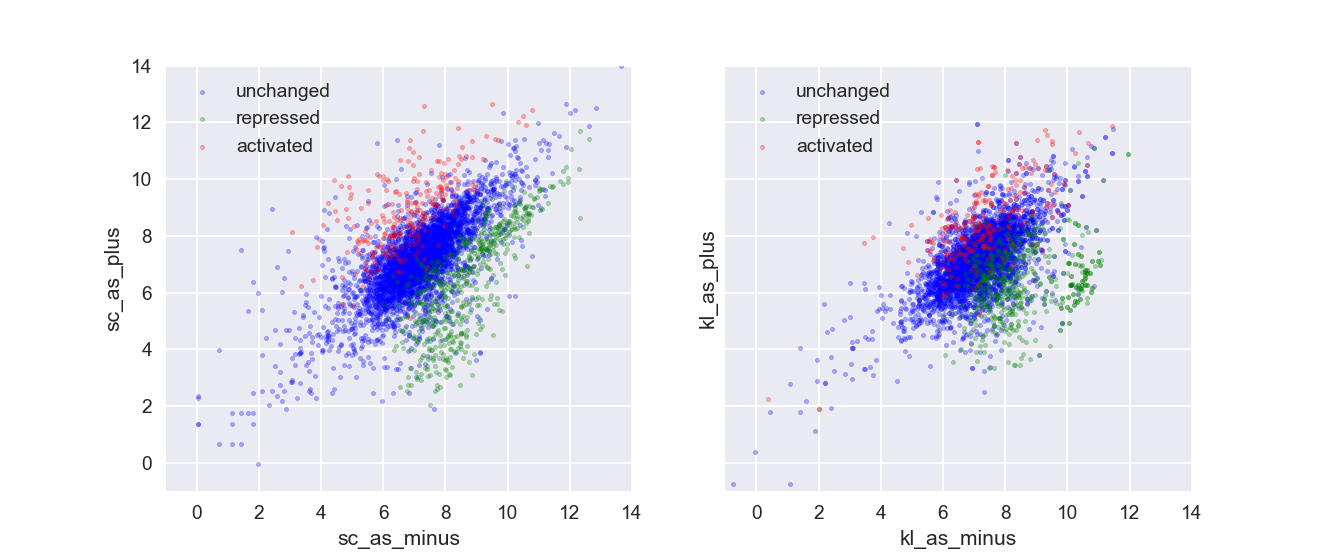

C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning:

divide by zero encountered in log



In [11]:
ESR_groups = kl_sc_PKA_data_counts.groupby('ESR_status')

# Plot
fig, axarr = plt.subplots(1,2, sharey=True)

x_axis = ['sc_as_minus','kl_as_minus']  # ['kl_as_minus','kl_as_plus'] #
y_axis = ['sc_as_plus','kl_as_plus']  #['sc_as_minus','sc_as_plus']  #
xy_axes = zip(x_axis,y_axis)

axarr_ind = 0
colordict = {'activated':'r', 'repressed':'g','unchanged':'b'}
group_list = ['unchanged','repressed','activated']

for xx, yy in xy_axes: 
    
    ax = axarr[axarr_ind]
    axarr_ind = axarr_ind + 1
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    
    for name in group_list:
        group = ESR_groups.get_group(name)
        ax.scatter(np.log(group.loc[:,xx]), np.log(group.loc[:,yy]), s = 5, c=colordict[name], alpha=0.3,  label=name)
    ax.legend()
    ax.set_xlabel(xx)
    ax.set_ylabel(yy)
    ax.set_xlim([-1,14])
    ax.set_ylim([-1,14])


plt.show()

,N SCer Orthologs,kl_genename,sc_genename,KL_PKA(AS)+1NMPP1,padj,SC_PKA(AS)+1NMPP1,SC_common_name,kl_as_minus,kl_as_plus,sc_as_minus,sc_as_plus,ESR_status
2,1,KLLA0F12056g,YKR076W,4.077268,0.000000e+00,3.018760,ECM4,1956.465443,35103.000576,273.461994,4758.357206,activated
9,1,KLLA0E08867g,YNL015W,2.750747,0.000000e+00,3.431360,PBI2,880.390460,6293.891492,1214.005518,20413.671379,activated
14,1,KLLA0E07503g,YNL305C,1.377882,6.632209e-47,2.822420,BXI1,495.289875,1367.547918,2620.677441,15151.738283,activated
23,1,KLLA0B12760g,YKL124W,0.982508,2.430264e-42,1.210740,SSH4,1199.893166,2520.207045,311.788107,1126.038218,activated
69,1,KLLA0A09713g,YMR291W,-0.753016,3.537654e-52,2.018130,TDA1,13788.162801,8693.395669,550.031510,7015.266424,activated
70,1,KLLA0C15609g,YPR098C,1.538274,4.305175e-116,2.612360,YPR098C,1312.931042,4052.518777,657.758962,3407.111345,activated
145,1,KLLA0B07337g,YJL161W,2.901681,1.251142e-200,4.116810,FMP33,289.640318,2300.851986,47.648681,1979.507528,activated
168,1,KLLA0E15137g,YKR049C,2.865398,5.112001e-267,3.126970,FMP46,433.754132,3365.936954,318.003152,4984.531406,activated
170,1,KLLA0C01738g,YLR178C,3.268890,0.000000e+00,5.527340,TFS1,1374.569649,14087.832638,905.324934,41733.006114,activated
178,1,KLLA0F01507g,YJL057C,2.565198,7.508463e-258,1.317400,IKS1,621.318875,3909.582749,1409.779446,6216.890829,activated


From Stewart-Ornstein et al 2013  http://www.sciencedirect.com/science/article/pii/S0960982213011901 there were 32 MSN2 target promoters that had "measureable basal expression and greater than 4-fold induction in one of the perturbations and lost at least 50% of this induction in a Δmsn2/4 background".  This is out of 40 that were identified from Gasch et al 2000, Huebert et al 2014, and Capaldi et al 2008. Those genes were: 

['SSA1', 'SSA4', 'HSP104', 'CTT1', 'TPK1', 'TFS1', 'DDR2', 'TSA1', 'HSP12', 'TMA10', 'TPS2', 'RTC3', 'GPH1', 'HXK1', 'TSA2', 'CYC7', 'PNC1', 'GSY1', 'FMP48', 'SS13', 'ALD4', 'YNR014W', 'HOR2', 'YOR173W', 'RAS2', 'GLK1', 'GPD1', 'HSP26', 'SIP18', 'TKL2', 'FMP16', 'ALD3']



In [42]:
#Highlight jso msn2 targets on scatter plot MSN2 Hits for K.Lactis 

kl_sc_PKA_data_msn2 = kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(jso_msn2_targets)]
kl_sc_PKA_data_notmsn2 = kl_sc_PKA_data[~kl_sc_PKA_data['SC_common_name'].isin(jso_msn2_targets)]

fig = {
    'data': [
  		{
        	'x': kl_sc_PKA_data_notmsn2['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_notmsn2['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_notmsn2['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'rest of genes'},
  		{
  			'x': kl_sc_PKA_data_msn2['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_msn2['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_msn2['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'JSO Msn2 Targets'}
            ],
    'layout': {
        'xaxis': {'title': 'KL LFC 4uM NMPP1'},
        'yaxis': {'title': "SC averaged Fold Change"}
    }
}

# IPython notebook
# py.iplot(fig, filename='pandas/multiple-scatter')

url = py.plot(fig, filename='sc_kl_scatter_jso_msn2_solis')



In [44]:
#Highlight STRE presence in KL equal to or greater than one
#Lookup by kl_genename common name
jso_prom_hits_kl_orthologs = pd.read_table(base_dir + "\expression_data\kl_PKA_as_20160824\\fimo_MSN2_KL_jso_targets.txt")
jso_prom_hits_kl_orthologs_exact = jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['matched sequence'].isin(['AGGGG'])]
jso_prom_hits_kl_hitcount = Counter(jso_prom_hits_kl_orthologs_exact['sequence name'])# counts the elements' frequency

stre_eq1 = [kl_gene for kl_gene, n in jso_prom_hits_kl_hitcount.items() if n==1]
stre_gt1 = [kl_gene for kl_gene, n in jso_prom_hits_kl_hitcount.items() if n>1]

kl_sc_PKA_data_msn2 = kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(jso_msn2_targets)]
kl_sc_PKA_data_msn2_stre_eq1 = kl_sc_PKA_data_msn2[kl_sc_PKA_data_msn2['kl_genename'].isin(stre_eq1)]
kl_sc_PKA_data_msn2_stre_gt1 = kl_sc_PKA_data_msn2[kl_sc_PKA_data_msn2['kl_genename'].isin(stre_gt1)]
kl_sc_PKA_data_msn2_stre_no = kl_sc_PKA_data_msn2[~kl_sc_PKA_data_msn2['kl_genename'].isin(stre_eq1+stre_gt1)]
kl_sc_PKA_data_notmsn2 = kl_sc_PKA_data[~kl_sc_PKA_data['SC_common_name'].isin(jso_msn2_targets)]

fig = {
    'data': [
  		{
        	'x': kl_sc_PKA_data_notmsn2['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_notmsn2['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_notmsn2['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'rest of genes'},
		{
        	'x': kl_sc_PKA_data_msn2_stre_no['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_msn2_stre_no['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_msn2_stre_no['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'JSO Msn2 Targets no stre'},
		{
        	'x': kl_sc_PKA_data_msn2_stre_eq1['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_msn2_stre_eq1['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_msn2_stre_eq1['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'JSO Msn2 Targets 1 stre'},
  		{
  			'x': kl_sc_PKA_data_msn2_stre_gt1['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_msn2_stre_gt1['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_msn2_stre_gt1['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'JSO Msn2 Targets >1 stre'}
            ],
    'layout': {
        'xaxis': {'title': 'KL LFC 4uM NMPP1'},
        'yaxis': {'title': "SC averaged Fold Change"}
    }
}

# IPython notebook
# py.iplot(fig, filename='pandas/multiple-scatter')

url = py.plot(fig, filename='sc_kl_scatter_jso_msn2_stre_solis')


In [45]:
#Plot SC "ESR activated" and "ESR repressed" genes onto SC/VS KL plot
# #For activation and repression
ESR_types = ['activated','repressed']
ESR_genes = {}
for ESR_type in ESR_types:
     ESR_genes[ESR_type] = io_library.get_gasch_ESR_list(ESR_type)

#241 activated genes
#539 repressed genes
#4196 remaining genes
kl_sc_PKA_data_ESR_activated = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(ESR_genes['activated'])]
kl_sc_PKA_data_ESR_repressed = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(ESR_genes['repressed'])]
kl_sc_PKA_data_notESR = kl_sc_PKA_data[~kl_sc_PKA_data['sc_genename'].isin(ESR_genes['repressed']+ESR_genes['activated'])]

fig = {
    'data': [
  		{
        	'x': kl_sc_PKA_data_notESR['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_notESR['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_notESR['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'non-ESR genes'},
  		{
        	'x': kl_sc_PKA_data_ESR_activated['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_ESR_activated['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_ESR_activated['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'ESR Activated genes'},
  		{
  			'x': kl_sc_PKA_data_ESR_repressed['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_ESR_repressed['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_ESR_repressed['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'ESR Repressed genes'}
            ],
    'layout': {
        'xaxis': {'title': 'KL LFC 4uM NMPP1'},
        'yaxis': {'title': "SC averaged Fold Change"}
    }
}

url = py.plot(fig, filename='ESR Activated and Repressed genes from Gasch Data - solis data')



In [3]:
#Make dataframe for use in R to plot numbers of STRE sites. 
#Load Fimo for KL
Msn2_hits_KL = pd.read_table(base_dir + "\expression_data\kl_PKA_as_20160824\\fimo_20170224_Msn2_KL_all.txt")
# filter step - could do it by Pvalue or exact motif 
#jso_prom_hits_kl_orthologs_exact = jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['matched sequence'].isin(['AGGGG'])]
Msn2_hits_KL_hitcount = Counter(Msn2_hits_KL['sequence name'])# counts the elements' frequency
Msn2_hits_KL_unique = Msn2_hits_KL_hitcount.keys()

#Msn2_hits_KL_gt1 = [kl_gene for kl_gene, n in Msn2_hits_KL_hitcount.items() if n>1]

#Load Fimo for SC
Msn2_hits_SC = pd.read_table(base_dir + "\expression_data\kl_PKA_as_20160824\\fimo_20170224_Msn2_SC_all.txt")
# filter step - could do it by Pvalue or exact motif 
#jso_prom_hits_kl_orthologs_exact = jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['matched sequence'].isin(['AGGGG'])]
Msn2_hits_SC_hitcount = Counter(Msn2_hits_SC['sequence name'])# counts the elements' frequency
Msn2_hits_SC_unique = Msn2_hits_SC_hitcount.keys()

#Msn2_hits_SC_gt1 = [sc_gene for sc_gene, n in Msn2_hits_SC_hitcount.items() if n>1]




In [18]:
kl_sc_PKA_data_msn2 = kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(jso_msn2_targets)]
kl_sc_PKA_data_msn2['SC_STREs'] = [Msn2_hits_SC_hitcount[gene] for gene in kl_sc_PKA_data_msn2['sc_genename']]
kl_sc_PKA_data_msn2['KL_STREs'] = [Msn2_hits_KL_hitcount[gene] for gene in kl_sc_PKA_data_msn2['kl_genename']]
kl_sc_PKA_data_msn2.to_csv(base_dir + "\expression_data\kl_PKA_as_20160824\msn2_hits_STREs.csv")



C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [102]:
kl_sc_PKA_data_motif_hits[kl_sc_PKA_data_motif_hits['kl_msn2_hits']>5]


,N SCer Orthologs,kl_genename,sc_genename,KL_PKA(AS)+1NMPP1,padj,SC_PKA(AS)+1NMPP1,SC_common_name,KL_msn2_hits,SC_msn2_hits,KL_cat8_hits,...,sc_msn2_hits,kl_cat8_hits,sc_cat8_hits,kl_rap1_hits,sc_rap1_hits,kl_dot6_hits,sc_dot6_hits,kl_hac1_hits,sc_hac1_hits,hover_text
2847,1,KLLA0C13948g,YMR302C,1.378599,2.221281e-99,0.729453,YME2,6,0,0,...,0,0,0,0,0,0,1,0,0,YME2<br>KL STRE sites: 6<br>SC STRE sites: 0<br>


In [4]:
#Build dataframe with motif hits for a number of transcription factors
motif_parameters_dict = {'msn2': ('20170224',{'kl':0.000710,'sc':0.000710}), 
                        'dot6': ('20170328',{'kl':1.0e-4,'sc':1.0e-4}),
                        'rap1':('20170328',{'kl':1.0e-4,'sc':1.0e-4}),
                        'cat8':('20170328',{'kl':4.0e-4,'sc':4.0e-4}),
                        'hac1':('20170328',{'kl':1.0e-4,'sc':1.0e-4}),
                        'hsf1':('20170330',{'kl':1.0e-4,'sc':1.0e-4}),
                        'oaf1':('20170330',{'kl':1.0e-4,'sc':1.0e-4}),
                        'gsm1':('20170330',{'kl':1.0e-4,'sc':1.0e-4}),
                        'hap3':('20170330',{'kl':1.0e-4,'sc':1.0e-4}),
                        'AAGGGA':('20170330',{'kl':3.0e-4,'sc':3.0e-4},
                        'azf1':('20170413',{'kl':3.0e-5,'sc':1.0e-5}), #more perfect matches with SC
                        'crz1':('20170413',{'kl':1.0e-4,'sc':1.0e-4}),  #not many - low information
                        'mig1':('20170413',{'kl':3.0e-4,'sc':3.0e-4}), #should lower threshold - only 136 matches with KL
                        'azf1':('20170413',{'kl':3.0e-5,'sc':3.0e-5}),
                        'azf1':('20170413',{'kl':3.0e-5,'sc':3.0e-5}),
                        'azf1':('20170413',{'kl':3.0e-5,'sc':3.0e-5}),
                        'azf1':('20170413',{'kl':3.0e-5,'sc':1.0e-5}),
                                 )
species_list = ['kl','sc']

#each motif has the following parameters in a tuple
# index by name: e.g. dot6
# date:  date fimo was run
# thresholds: dictionary with threshold for each species

kl_sc_PKA_data_motif_hits = kl_sc_PKA_data.copy()

#should break out the part that builds the new database separately so that it can be saved and ported elsewehre. 
for motif in motif_parameters_dict.keys(): 
    print motif
    # For each species add a column to the data frame to represent the hits.
    for species in species_list: 
        # Load Fimo data
        date = motif_parameters_dict[motif][0]
        hits = pd.read_table(base_dir + "\expression_data\kl_promoters\\fimo_" + date + "_"+ species +"_" + motif + ".txt")
        
        #filter hits
        thresh = motif_parameters_dict[motif][1][species]
        # # # filter step - could do it by Pvalue or exact motif 
        hits_filtered = hits[hits['p-value']<thresh]
        # #jso_prom_hits_kl_orthologs_exact = jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['matched sequence'].isin(['AGGGG'])]
        hitcount = Counter(hits_filtered['sequence name'])# counts the elements' frequency

        hits_list = [hitcount[gene] for gene in kl_sc_PKA_data_motif_hits[species + '_genename']]
        #add data back to dataframe
        kl_sc_PKA_data_motif_hits[species + "_" + motif + "_hits"] = hits_list
    
#Save kl_sc_PKA_data_motif_hits 
kl_sc_PKA_data_motif_hits.to_pickle(base_dir + "\expression_data\kl_PKA_as_20160824\kl_sc_PKA_data_motif_hits")


msn2
hsf1
gsm1
oaf1
dot6
hap3
cat8
rap1
AAGGGA
hac1


In [25]:
kl_sc_PKA_data_motif_hits = pd.read_pickle(base_dir + "\expression_data\kl_PKA_as_20160824\kl_sc_PKA_data_motif_hits")

In [28]:
kl_sc_PKA_data_motif_hits.columns

Index([u'N SCer Orthologs', u'kl_genename', u'sc_genename',
       u'KL_PKA(AS)+1NMPP1', u'padj', u'SC_PKA(AS)+1NMPP1', u'SC_common_name',
       u'kl_msn2_hits', u'sc_msn2_hits', u'kl_hsf1_hits', u'sc_hsf1_hits',
       u'kl_gsm1_hits', u'sc_gsm1_hits', u'kl_oaf1_hits', u'sc_oaf1_hits',
       u'kl_dot6_hits', u'sc_dot6_hits', u'kl_hap3_hits', u'sc_hap3_hits',
       u'kl_cat8_hits', u'sc_cat8_hits', u'kl_rap1_hits', u'sc_rap1_hits',
       u'kl_AAGGGA_hits', u'sc_AAGGGA_hits', u'kl_hac1_hits', u'sc_hac1_hits'],
      dtype='object')

In [29]:
kl_act = kl_sc_PKA_data_motif_hits[kl_sc_PKA_data_motif_hits['KL_PKA(AS)+1NMPP1']>2.0]

<IPython.core.display.Javascript object>


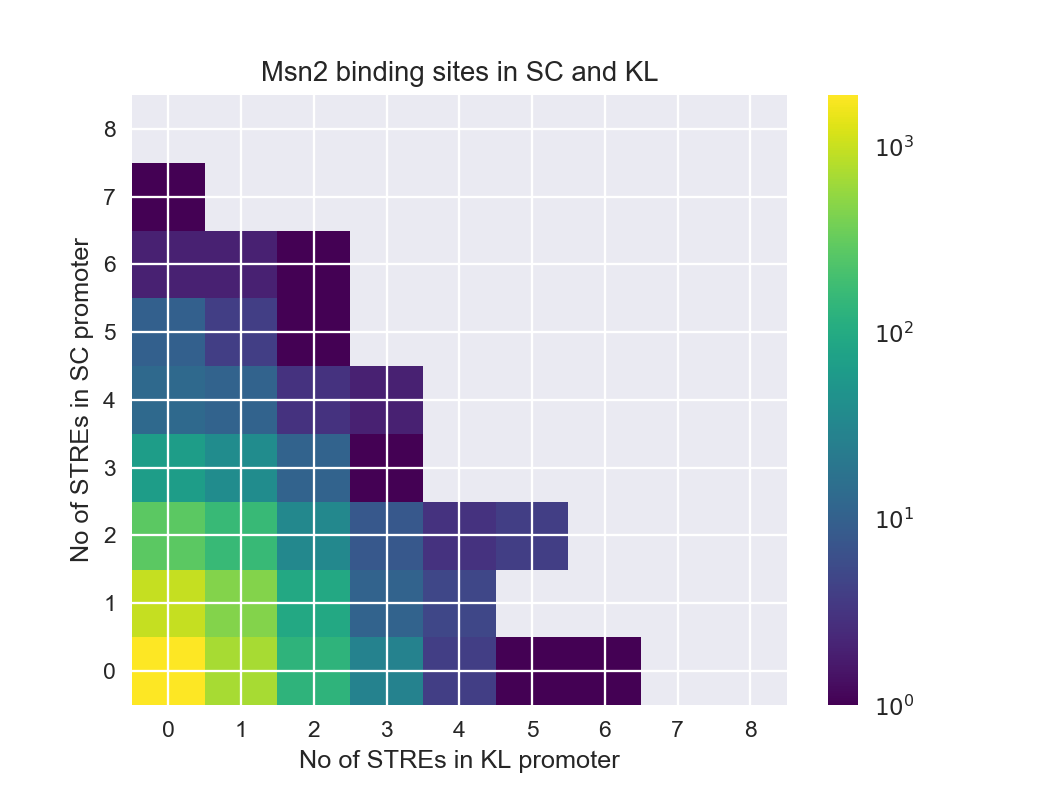

In [8]:
#Plot 2D histogram for just Msn2
#Highlight Msn2 hits for SC, KL and both
plt.hist2d(kl_sc_PKA_data_motif_hits['kl_msn2_hits'],kl_sc_PKA_data_motif_hits['sc_msn2_hits'], bins = [9,9], range = [[-0.5,8.5],[-0.5,8.5]], norm=LogNorm(), cmap = 'viridis')
plt.xlabel('No of STREs in KL promoter')
plt.ylabel('No of STREs in SC promoter')
plt.title('Msn2 binding sites in SC and KL')
plt.colorbar()
# About twice as many STRE's in KL genome as in SC genome  (about 2k v.s. 4k)


# url = py.plot(fig, filename='STRE presence in SC or KL promoters')

plt.show()

In [22]:
xlabel_indices

[3, 4, 5]

<IPython.core.display.Javascript object>


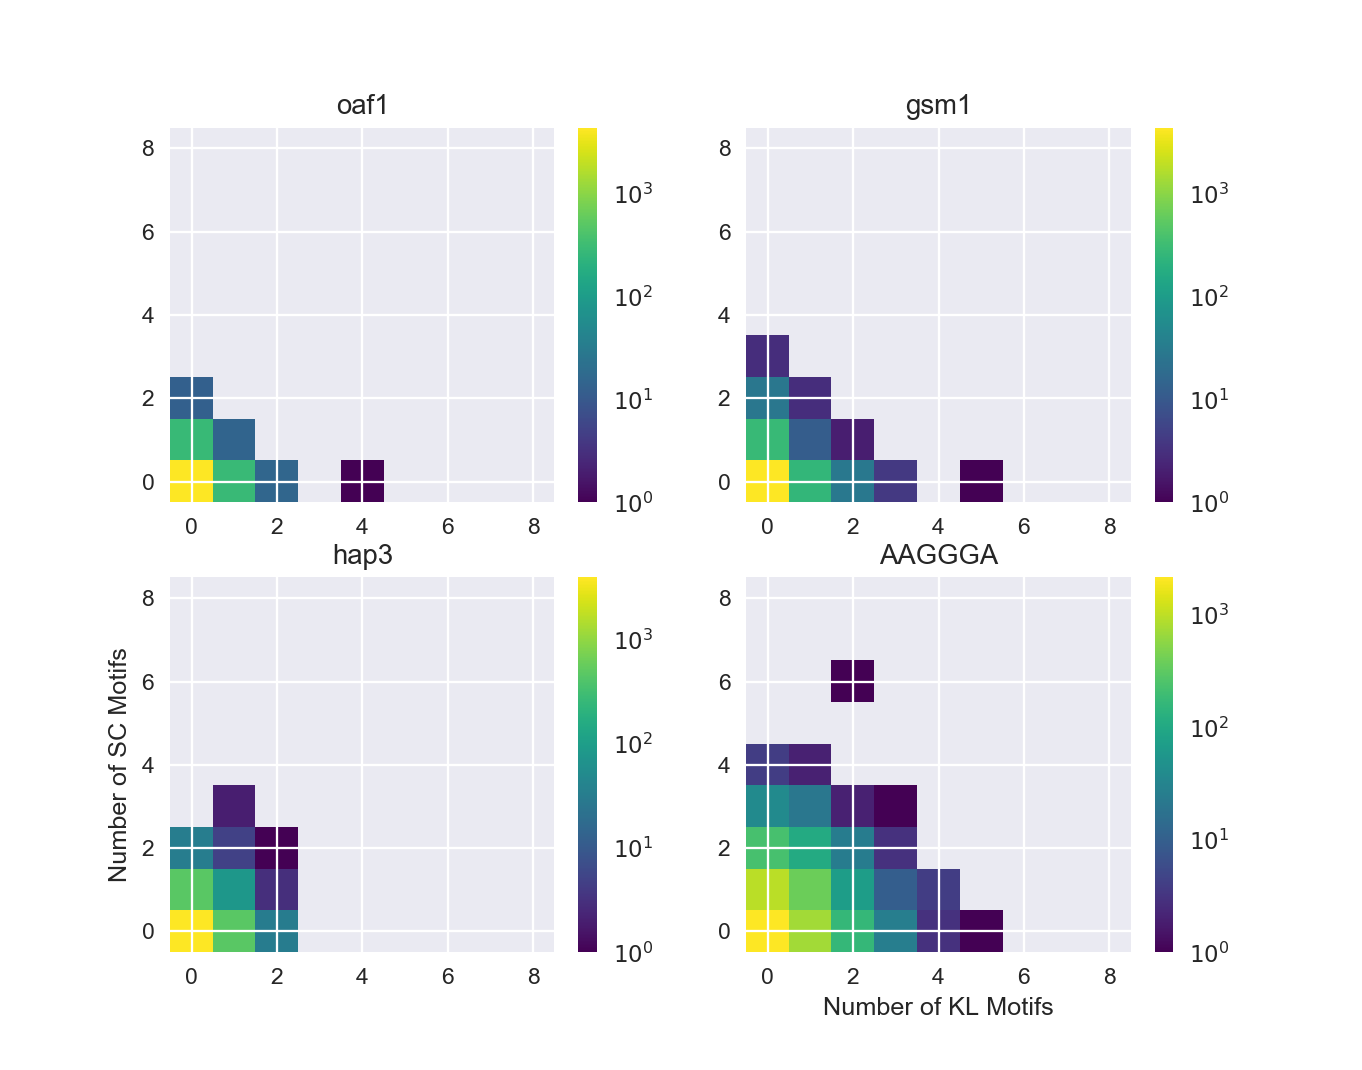

oaf1
gsm1
hap3
AAGGGA


In [23]:
#Plot 2D histogram for several TFs
nrows = 2
ncols = 2 #3
fig, axarr = plt.subplots(nrows,ncols) #, sharex = True, sharey = True)
ylabel_indices = [ncols*jj for jj in range(0,nrows)]
xlabel_indices = [jj+ncols*(nrows-1) for jj in range(0,ncols)]



#for jj, motif in enumerate(['msn2','cat8','hac1','dot6','rap1','hsf1']): 
for jj, motif in enumerate(['oaf1','gsm1','hap3','AAGGGA']): 
    ax = axarr[int(np.floor(jj/ncols)),np.mod(jj,ncols)]
    print motif
    # For each species add a column to the data frame to represent the hits.
    
    #ax.scatter(kl_sc_PKA_data_motif_hits['sc_'+ motif +'_hits'],kl_sc_PKA_data_motif_hits['kl_' + motif +'_hits'])
    ax.set_title(motif)
    if jj in set([ncols]): 
        ax.set_ylabel('Number of SC Motifs')
    if jj in set([3,4,5]): 
        ax.set_xlabel('Number of KL Motifs')
    
    # #Might be interesting to plot the number of 
    ax.hist2d(kl_sc_PKA_data_motif_hits['kl_'+ motif +'_hits'],kl_sc_PKA_data_motif_hits['sc_' + motif +'_hits'], bins = [9,9], range = [[-0.5,8.5],[-0.5,8.5]], norm=LogNorm(), cmap = 'viridis')
    im = ax.images[0]
    fig.colorbar(im, ax=ax)
    

# plt.show()

In [24]:
#already done: 
#['msn2','cat8','hac1','dot6','rap1']


for jj, motif in enumerate(['hsf1','oaf1','gsm1','hap3','AAGGGA']): 
    print motif
    hover_text = []
    for index, row in kl_sc_PKA_data_motif_hits.iterrows():
        hover_text.append(('{SC_common_name}<br>' +
                          'KL '+ motif + ' sites: {kl_motif}<br>'+
                          'SC ' + motif + ' sites: {sc_motif}<br>').format(SC_common_name=row['SC_common_name'],
                                                kl_motif=row['kl_' + motif + '_hits'],
                                                sc_motif=row['sc_' + motif + '_hits']))

    kl_sc_PKA_data_motif_hits['hover_text_' + motif] = hover_text



    data = [
        {
            'x': kl_sc_PKA_data_motif_hits['KL_PKA(AS)+1NMPP1'],
            'y': kl_sc_PKA_data_motif_hits['SC_PKA(AS)+1NMPP1'],
            'text': kl_sc_PKA_data_motif_hits['hover_text_' + motif],
            'mode': 'markers',
            'marker': {
                'color': kl_sc_PKA_data_motif_hits['kl_' + motif + '_hits'],
                'size': kl_sc_PKA_data_motif_hits['sc_' + motif + '_hits']+1,
                'sizeref': 0.2,
                'showscale': True
            }
        }
    ]



    url = py.plot(data, filename= 'bubble plot ' + motif)


hsf1
oaf1
gsm1
hap3
AAGGGA


In [ ]:


#Msn2_hits_KL_unique = Msn2_hits_KL_hitcount.keys()

# Msn2_hits_KL_gt1 = [kl_gene for kl_gene, n in Msn2_hits_KL_hitcount.items() if n>1]


# Msn2_hits_SC_unique = Msn2_hits_SC_hitcount.keys()

# Msn2_hits_SC_gt1 = [sc_gene for sc_gene, n in Msn2_hits_SC_hitcount.items() if n>1]

#Subset all KL/SC data based on Fimo results
#kl_sc_PKA_data_msn2_SC = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(Msn2_hits_SC_unique)]
#kl_sc_PKA_data_msn2_KL = kl_sc_PKA_data[kl_sc_PKA_data['kl_genename'].isin(Msn2_hits_KL_unique)]
# kl_sc_PKA_data_msn2_SC = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(Msn2_hits_SC_gt1)]
# kl_sc_PKA_data_msn2_KL = kl_sc_PKA_data[kl_sc_PKA_data['kl_genename'].isin(Msn2_hits_KL_gt1)]
# msn2_SC_hits = set(kl_sc_PKA_data_msn2_SC.index)
# msn2_KL_hits = set(kl_sc_PKA_data_msn2_KL.index)
# msn2_SC_KL_hits = msn2_SC_hits.intersection(msn2_KL_hits)

# kl_sc_PKA_data_msn2_both = kl_sc_PKA_data.loc[list(msn2_SC_KL_hits)]
# kl_sc_PKA_data_msn2_SC_only =  kl_sc_PKA_data.loc[list(msn2_SC_hits.difference(msn2_SC_KL_hits))]
# kl_sc_PKA_data_msn2_KL_only =  kl_sc_PKA_data.loc[list(msn2_KL_hits.difference(msn2_SC_KL_hits))]
# kl_sc_PKA_data_msn2_none = kl_sc_PKA_data.loc[list(set(kl_sc_PKA_data.index).difference(msn2_SC_hits.union(msn2_KL_hits)))]

# cf.set_config_file(offline=False, world_readable=True, theme='pearl')

# df2007.iplot(kind='bubble', x='gdpPercap', y='lifeExp', size='pop', text='country',
#              xTitle='GDP per Capita', yTitle='Life Expectancy',
#              filename='cufflinks/simple-bubble-chart')

# fig = {
#     'data': [
#   		{
#         	'x': kl_sc_PKA_data_msn2_both['KL_PKA(AS)+1NMPP1'], 
#         	'y': kl_sc_PKA_data_msn2_both['SC_PKA(AS)+1NMPP1'], 
#         	'text': kl_sc_PKA_data_msn2_both['SC_common_name'], 
#         	'mode': 'markers', 
#         	'name': 'STRE in SC and KL promoter'},
#   		{
#         	'x': kl_sc_PKA_data_msn2_SC_only['KL_PKA(AS)+1NMPP1'], 
#         	'y': kl_sc_PKA_data_msn2_SC_only['SC_PKA(AS)+1NMPP1'], 
#         	'text': kl_sc_PKA_data_msn2_SC_only['SC_common_name'], 
#         	'mode': 'markers', 
#         	'name': 'STRE in SC promoter only'},
#         {
#         	'x': kl_sc_PKA_data_msn2_KL_only['KL_PKA(AS)+1NMPP1'], 
#         	'y': kl_sc_PKA_data_msn2_KL_only['SC_PKA(AS)+1NMPP1'], 
#         	'text': kl_sc_PKA_data_msn2_KL_only['SC_common_name'], 
#         	'mode': 'markers', 
#         	'name': 'STRE in KL promoter only'},
#   		{
#   			'x': kl_sc_PKA_data_msn2_none['KL_PKA(AS)+1NMPP1'], 
#         	'y': kl_sc_PKA_data_msn2_none['SC_PKA(AS)+1NMPP1'], 
#         	'text': kl_sc_PKA_data_msn2_none['SC_common_name'], 
#         	'mode': 'markers', 
#         	'name': 'no STRE'}
#             ],
#     'layout': {
#         'xaxis': {'title': 'KL LFC 4uM NMPP1'},
#         'yaxis': {'title': "SC averaged Fold Change"}
#     }
# }

In [26]:


# for kl_gene in kl_sc_PKA_data['kl_genename']:
#     try: 
#         hits = Msn2_hits_KL_hitcount[kl_gene]
#         Msn2_hits_KL_list.append(hits)
#     except 
# Msn2_hits_KL_hitcount[Msn2_hits_KL_unique[3]]

(4976, 7)

In [19]:
[gene for gene in kl_sc_PKA_data['kl_genename']]

['KLLA0E08273g',
 'KLLA0E02179g',
 'KLLA0F12056g',
 'KLLA0E19691g',
 'KLLA0F20273g',
 'KLLA0D06127g',
 'KLLA0E07063g',
 'KLLA0F04499g',
 'KLLA0C15257g',
 'KLLA0E08867g',
 'KLLA0F25234g',
 'KLLA0F14773g',
 'KLLA0E05523g',
 'KLLA0C14652g',
 'KLLA0E07503g',
 'KLLA0F15015g',
 'KLLA0B11385g',
 'KLLA0C05676g',
 'KLLA0E18943g',
 'KLLA0A00935g',
 'KLLA0E10913g',
 'KLLA0F18678g',
 'KLLA0A00440g',
 'KLLA0B12760g',
 'KLLA0F21868g',
 'KLLA0C16940g',
 'KLLA0D05731g',
 'KLLA0B11253g',
 'KLLA0E22155g',
 'KLLA0F22066g',
 'KLLA0F20119g',
 'KLLA0E05611g',
 'KLLA0E22507g',
 'KLLA0E13795g',
 'KLLA0E24311g',
 'KLLA0B01738g',
 'KLLA0D04664g',
 'KLLA0C01562g',
 'KLLA0E23167g',
 'KLLA0E09197g',
 'KLLA0C04323g',
 'KLLA0C05566g',
 'KLLA0A06149g',
 'KLLA0C06490g',
 'KLLA0C13926g',
 'KLLA0B08459g',
 'KLLA0F05115g',
 'KLLA0D00440g',
 'KLLA0B13387g',
 'KLLA0F03949g',
 'KLLA0F07249g',
 'KLLA0E12651g',
 'KLLA0F16170g',
 'KLLA0E15093g',
 'KLLA0C11847g',
 'KLLA0D18095g',
 'KLLA0F05027g',
 'KLLA0B09790g',
 'KLLA0D07678g

In [45]:
jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['sequence name'].isin(['KLLA0F00440g','KLLA0F06138g', 'KLLA0D09999g'])]
jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['sequence name'].isin(['KLLA0C01155g','KLLA0F21736g', 'KLLA0E10253g'])]
jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['sequence name'].isin(['KLLA0C04004g'])]


,#pattern name,sequence name,start,stop,strand,score,p-value,q-value,matched sequence
1,MA0341.1,KLLA0C04004g,86,90,+,9.72368,0.000709,1,AGGGG
20,MA0341.1,KLLA0C04004g,87,91,+,9.09211,0.001290,1,GGGGG
41,MA0341.1,KLLA0C04004g,352,356,+,6.90789,0.001870,1,CGGGG
49,MA0341.1,KLLA0C04004g,116,120,-,-1.42105,0.002580,1,TGGGG
55,MA0341.1,KLLA0C04004g,201,205,-,-1.42105,0.002580,1,TGGGG
86,MA0341.1,KLLA0C04004g,175,179,-,-2.35526,0.006040,1,AGGGA
87,MA0341.1,KLLA0C04004g,176,180,-,-2.35526,0.006040,1,AAGGG
214,MA0341.1,KLLA0C04004g,664,668,+,-2.35526,0.006040,1,AGAGG
229,MA0341.1,KLLA0C04004g,303,307,-,-2.40789,0.008880,1,ACGGG
234,MA0341.1,KLLA0C04004g,368,372,-,-2.40789,0.008880,1,AGCGG


In [ ]:
#Plot Msn2 hits on top of correlation plot between SCer and KLac
# fname = "gasch_fig7_all_conditions.txt"
# gasch_Msn24_top_hits = io_library.read_gasch_data([conditions_Msn24[0]],fname) #only need indices so using dummy variable. 
# orth_expression_df['orfs']=orth_expression_df['SCer_gene']
# top_hit_check = lambda orf: orf in set(gasch_Msn24_top_hits.index)
# orth_expression_df['Msn24_hit'] = orth_expression_df['orfs'].apply(top_hit_check)

# sns.pairplot(orth_expression_df, x_vars = ['KLac_exp'], y_vars = 'SCer_exp', hue = 'Msn24_hit')



#Highlight Msn2 Targets

# #Plot Msn2 hits on top of correlation plot between SCer and KLac
# fname = "gasch_fig7_all_conditions.txt"
# gasch_Msn24_top_hits = io_library.read_gasch_data([conditions_Msn24[0]],fname) #only need indices so using dummy variable. 
# orth_expression_df['orfs']=orth_expression_df['SCer_gene']
# top_hit_check = lambda orf: orf in set(gasch_Msn24_top_hits.index)
# orth_expression_df['Msn24_hit'] = orth_expression_df['orfs'].apply(top_hit_check)

# sns.pairplot(orth_expression_df, x_vars = ['KLac_exp'], y_vars = 'SCer_exp', hue = 'Msn24_hit')


# fname = "gasch_complete_dataset.txt"
# conditions_Msn24 = ['DBY7286 37degree heat - 20 min', 'DBYmsn2-4- 37degree heat - 20 min',  'DBYmsn2/4 (real strain) + 37degrees (20 min)', 'DBY7286 + 0.3 mM H2O2 (20 min)','DBYmsn2msn4 (good strain) + 0.32 mM H2O2','DBYmsn2/4 (real strain) + 0.32 mM H2O2 (20 min)','Msn2 overexpression (repeat)','Msn4 overexpression']
# gasch_Msn24_data = io_library.read_gasch_data(conditions_Msn24,fname)
# gasch_Msn24_data.columns = ['WT HS','msn2/4 HS 1','msn2/4 HS2','WT Ox','msn2/4 Ox 1', 'msn2/4 Ox 2', 'msn2 Overexp', 'msn4 Overexp']
# #fig, axarr = expression_plots.multi_scatter_plot(gasch_Msn24_data, conditions) # xlim = xlim, ylim = ylim)

# #Get top Msn24 hits
# fname = "gasch_fig7_all_conditions.txt"
# gasch_Msn24_top_hits = io_library.read_gasch_data([conditions_Msn24[0]],fname) #only need indices so using dummy variable. 
# gasch_Msn24_data['orfs']=gasch_Msn24_data.index
# top_hit_check = lambda orf: orf in set(gasch_Msn24_top_hits.index)
# gasch_Msn24_data['Msn24_hit'] = gasch_Msn24_data['orfs'].apply(top_hit_check)

# conditions = ['WT HS','msn2/4 HS 1','msn2/4 HS2','WT Ox','msn2/4 Ox 1', 'msn2/4 Ox 2', 'msn2 Overexp', 'msn4 Overexp']
# sns.pairplot(gasch_Msn24_data,x_vars=[conditions[3]],y_vars = [conditions[5]], hue="Msn24_hit")
# #sns.pairplot(gasch_Msn24_data,x_vars=[conditions[0],conditions[3]],y_vars = [conditions[2],conditions[5],conditions[6]], hue="Msn24_hit")
# #sns.lmplot(x=conditions[1], y=conditions[3], data=gasch_Msn24_data, hue="Msn24_hit")
#            #col_wrap=2, ci=None, palette="muted", size=4,
#            #scatter_kws={"s": 50, "alpha": 1})
        
        
#Hightlight Msn2 Targets from Jacob's Paper. 

#Highlight Statistically significant items.  

#Look for STRE in sets of Msn2 targets (all SC targets, all KL targets, Targets with shared or different PKA induction)
#Unbiased STRE search in KLac genes
#unbiased motif search in activated / repressed KLac genes

#Dot6 Targets
#Glucose Gropout Targets


In [81]:
#Import SC Count data 
# #Load Kieran's PKA inhibition data
# fname_mace_SC_PKA_data = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq\SC_1NMPP1_From_Kieran.tsv')
# mace_SC_PKA_data = pd.read_table(fname_mace_SC_PKA_data, sep = ' ')
# mace_SC_PKA_data.columns = ['sc_genename','SC_WT_minus','SC_AS_plus','SC_WT_plus']


# #Makes a new column that combines sc_genename and kl_genename into a single index, and stores a subset of the data with just the counts
# #as a .csv in order to import to R. 
# kl_sc_PKA_conditions = ['AS1_minus', 'AS1_plus','AS2_minus', 'AS2_plus', 'WT_minus', 'WT_plus',
#        'SC_AS_plus', 'SC_WT_minus', 'SC_WT_plus']
# kl_sc_PKA_data['sc_kl_genename'] = kl_sc_PKA_data['kl_genename'] + '_' + kl_sc_PKA_data['sc_genename']
# kl_sc_PKA_data_subset = kl_sc_PKA_data.loc[:,kl_sc_PKA_conditions + ['sc_kl_genename']]
# kl_sc_PKA_data_subset.set_index('sc_kl_genename', inplace = True)
# kl_sc_PKA_data_subset.to_csv(base_dir + '\expression_data\kl_PKA_as_20160824\kl_sc_NMPP1_count_data.csv')

#will eventually want to include SC Orf


In [ ]:




# #for each row in the SC PKA inhibition data add a tuple with (SC Gene name, SC Expression, KL Gene Name, KL Expression)
# orth_expression = []
# SC_data = SC_PKA_data_norm['Pincus']
# for line in SC_data.iteritems(): 
#     SCer_gene = line[0]
#     SCer_exp = line[1]
#     try:
#         kl_orths = orth_lookup_SCer_KLac_dict[SCer_gene]
#         if kl_orths[0] == 'NONE':
#             KLac_gene = None
#             KLac_exp = None
#         else:
#             for KLac_gene in kl_orths:
#                 try: 
#                     #KLac_exp = kl_PKA_data_norm['AS_log_fold_change'][KLac_gene]
#                     KLac_exp = kl_PKA_data_norm['log_AS_fold_change/WT_fold_change'][KLac_gene]
                    
#                 except KeyError: 
#                     KLac_exp = None
#                 orth_expression.append((SCer_gene, SCer_exp, KLac_gene, KLac_exp))
                
#     except KeyError:
#         KLac_gene = None
#         KLac_exp = None
#         orth_expression.append((SCer_gene, SCer_exp, KLac_gene, KLac_exp))

# orth_expression_df = pd.DataFrame(orth_expression, columns = ['SCer_gene','SCer_exp','KLac_gene','KLac_exp'])
# #output is a list of ression values for each ortholog

# #After generating a dataframe with orthologs and expression values for each SC Gene, make plotting vectors: 

# # Iterate through each SC Gene
# # If there is an orthololog and there is an expression value
# # If there's just one value, put that in the x column
# # If there's more than one value put that in he 
    
# #Convert KL_orth to joined string

In [ ]:
#Old code for comparing orthologs 

# #Load SC data from Pincus and KLac NMPP1 gene expression data in order to compare expression of orthologs

# # To Do: Apples to Apples Comparison first and then adjust items that go up in just WT + drug

# species2 = 'Kluyveromyces lactis'
# species1 = 'Saccharomyces cerevisiae' 
# orth_lookup_SCer_KLac_dict = io_library.read_orth_lookup_table(species1, species2) #Should have directory name

# #for each row in the SC PKA inhibition data add a tuple with (SC Gene name, SC Expression, KL Gene Name, KL Expression)
# orth_expression = []
# SC_data = SC_PKA_data_norm['Pincus']
# for line in SC_data.iteritems(): 
#     SCer_gene = line[0]
#     SCer_exp = line[1]
#     try:
#         kl_orths = orth_lookup_SCer_KLac_dict[SCer_gene]
#         if kl_orths[0] == 'NONE':
#             KLac_gene = None
#             KLac_exp = None
#         else:
#             for KLac_gene in kl_orths:
#                 try: 
#                     #KLac_exp = kl_PKA_data_norm['AS_log_fold_change'][KLac_gene]
#                     KLac_exp = kl_PKA_data_norm['log_AS_fold_change/WT_fold_change'][KLac_gene]
                    
#                 except KeyError: 
#                     KLac_exp = None
#                 orth_expression.append((SCer_gene, SCer_exp, KLac_gene, KLac_exp))
                
#     except KeyError:
#         KLac_gene = None
#         KLac_exp = None
#         orth_expression.append((SCer_gene, SCer_exp, KLac_gene, KLac_exp))

# orth_expression_df = pd.DataFrame(orth_expression, columns = ['SCer_gene','SCer_exp','KLac_gene','KLac_exp'])
# #output is a list of ression values for each ortholog

# #After generating a dataframe with orthologs and expression values for each SC Gene, make plotting vectors: 

# # Iterate through each SC Gene
# # If there is an orthololog and there is an expression value
# # If there's just one value, put that in the x column
# # If there's more than one value put that in he 
    
# #Convert KL_orth to joined string

# #Plot Correlation between SCer and KLac orthologs
# sns.pairplot(orth_expression_df, x_vars = ['KLac_exp'], y_vars = 'SCer_exp')

# #Plot Msn2 hits on top of correlation plot between SCer and KLac
# fname = "gasch_fig7_all_conditions.txt"
# gasch_Msn24_top_hits = io_library.read_gasch_data([conditions_Msn24[0]],fname) #only need indices so using dummy variable. 
# orth_expression_df['orfs']=orth_expression_df['SCer_gene']
# top_hit_check = lambda orf: orf in set(gasch_Msn24_top_hits.index)
# orth_expression_df['Msn24_hit'] = orth_expression_df['orfs'].apply(top_hit_check)

# sns.pairplot(orth_expression_df, x_vars = ['KLac_exp'], y_vars = 'SCer_exp', hue = 'Msn24_hit')

# # fig, ax = plt.subplots()
# # xx = orth_expression_df['KLac_exp'][orth_expression_df['KLac_exp'].notnull()]
# # yy = orth_expression_df['SCer_exp'][orth_expression_df['KLac_exp'].notnull()]
# # ax.scatter(xx,yy)
# # ax.set_xlabel('KLac Log Fold Change w/ 1NMPP1')
# # ax.set_ylabel('SCer Log Fold Change w/ 1NMPP1 (Pincus)')



# #Gene subsets

# gene_subset = (set(xx[yy>-2.25].index) & set(xx[xx<-4.00].index))
# fig, ax = plt.subplots()
# xx = orth_expression_df['KLac_exp'][gene_subset]
# yy = orth_expression_df['SCer_exp'][gene_subset]
# ax.scatter(xx,yy)
# ax.set_xlabel('KLac Log Fold Change w/ 1NMPP1')
# ax.set_ylabel('SCer Log Fold Change w/ 1NMPP1 (OShea Lab)')

# #Make list of SC Gene, KL Gene and their respective annotations. 
# orth_expression_subset = orth_expression_df.loc[gene_subset,:]
# orth_expression_subset.sort_values(by = 'KLac_exp', inplace = True)

# SC_orfs_lookup, SC_genename_lookup, SC_features_lookup = io_library.read_SGD_features()

# annotation_KL =[]
# annotation_SC =[]
# SCer_gene_name = []

# for gene_exp in orth_expression_subset.iterrows():
#     SCer_gene = gene_exp[1]['SCer_gene']
#     KLac_gene = gene_exp[1]['KLac_gene']
#     SCer_gene_name.append(SC_genename_lookup[SCer_gene])
#     annotation_SC.append(SC_features_lookup[SCer_gene])
#     annotation_KL.append(annotation_lookup[KLac_gene])


# orth_expression_subset['SCer name'] = SCer_gene_name
# orth_expression_subset['SCer annotation'] = annotation_SC
# orth_expression_subset['KLac annotation'] = annotation_KL

# orth_expression_subset



# fname = "gasch_complete_dataset.txt"
# conditions_Msn24 = ['DBY7286 37degree heat - 20 min', 'DBYmsn2-4- 37degree heat - 20 min',  'DBYmsn2/4 (real strain) + 37degrees (20 min)', 'DBY7286 + 0.3 mM H2O2 (20 min)','DBYmsn2msn4 (good strain) + 0.32 mM H2O2','DBYmsn2/4 (real strain) + 0.32 mM H2O2 (20 min)','Msn2 overexpression (repeat)','Msn4 overexpression']
# gasch_Msn24_data = io_library.read_gasch_data(conditions_Msn24,fname)
# gasch_Msn24_data.columns = ['WT HS','msn2/4 HS 1','msn2/4 HS2','WT Ox','msn2/4 Ox 1', 'msn2/4 Ox 2', 'msn2 Overexp', 'msn4 Overexp']
# #fig, axarr = expression_plots.multi_scatter_plot(gasch_Msn24_data, conditions) # xlim = xlim, ylim = ylim)

# #Get top Msn24 hits
# fname = "gasch_fig7_all_conditions.txt"
# gasch_Msn24_top_hits = io_library.read_gasch_data([conditions_Msn24[0]],fname) #only need indices so using dummy variable. 
# gasch_Msn24_data['orfs']=gasch_Msn24_data.index
# top_hit_check = lambda orf: orf in set(gasch_Msn24_top_hits.index)
# gasch_Msn24_data['Msn24_hit'] = gasch_Msn24_data['orfs'].apply(top_hit_check)

# conditions = ['WT HS','msn2/4 HS 1','msn2/4 HS2','WT Ox','msn2/4 Ox 1', 'msn2/4 Ox 2', 'msn2 Overexp', 'msn4 Overexp']
# sns.pairplot(gasch_Msn24_data,x_vars=[conditions[3]],y_vars = [conditions[5]], hue="Msn24_hit")
# #sns.pairplot(gasch_Msn24_data,x_vars=[conditions[0],conditions[3]],y_vars = [conditions[2],conditions[5],conditions[6]], hue="Msn24_hit")
# #sns.lmplot(x=conditions[1], y=conditions[3], data=gasch_Msn24_data, hue="Msn24_hit")
#            #col_wrap=2, ci=None, palette="muted", size=4,
#            #scatter_kws={"s": 50, "alpha": 1})


